# **Table of contents**

* [Used data](#used-data)

* [Importing dependencies and loading data](#importing-dependencies-and-loading-data)
    * [Dependencies](#import-dependencies)
    * [Data upload](#data-upload---livestock-farms-registry-and-their-animals)
    * [Export data to CSV](#exporting-our-final-database-to-csv-format)
    * [Export data to JSON](#exporting-our-final-database-to-json-format)

* [Data obtained from the dataset](#data-obtained-from-the-dataset)
    * [Number of livestock farms per island](#number-of-livestock-farms-per-island)
    * [Number of livestock farms per municipalities](#number-of-livestock-farms-per-municipalities)
    * [Number of animals per livestock farm](#number-of-animals-per-livestock-farm)
    * [Number of animals per island](#number-of-animals-per-island)
    * [Number of animals per municipalities](#number-of-animals-per-municipalities)
    * [List of animal types, their breed, and purpose by island](#list-of-animal-types-their-breed-and-purpose-by-island)
    * [List of animal types, their breed, and purpose by municipalities](#list-of-animal-types-their-breed-and-purpose-by-municipalities)

* [Geographic data obtained from the dataset](#geographic-data-obtained-from-the-dataset)

    * [Locations of farms by animal species and island](#locations-of-farms-by-animal-species-and-island)
    * [Locations of farms by animal species and municipality](#locations-of-farms-by-animal-species-and-municipality)
    * [Locations of farms by animal species](#locations-of-farms-by-animal-species)
    * [Locations of farms by animals type and island](#locations-of-farms-by-animals-type-and-island)
    * [Locations of farms by animals type and municipality](#locations-of-farms-by-animals-type-and-municipality)
    * [Locations of farms by animals type](#locations-of-farms-by-animals-type)
    * [Locations of farms by animals breed and island](#locations-of-farms-by-animals-breed-and-island)
    * [Locations of farms by animals breed and municipality](#locations-of-farms-by-animals-breed-and-municipality)
    * [Locations of farms by animals breed](#locations-of-farms-by-animals-breed)
---

# **Used data**

- **Data source portal:** https://datos.canarias.es/portal/

- **Livestock farms registry and their animals:** https://datos.canarias.es/catalogos/general/showcase/registro-de-explotaciones-ganaderas-de-canarias-regac

---

# **Importing dependencies and loading data**

##### Import dependencies

In [26]:
import io
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

##### Data upload - Livestock farms registry and their animals

In [27]:
livestockFarmsURL = "https://datos.canarias.es/catalogos/general/dataset/d637f41d-2608-46c9-8560-4a42ee1f8bc1/resource/30cfd468-8cac-498d-b2d8-0c1f39703dfc/download/regac_explotaciones_202201.csv"
stringLivestockFarms = requests.get(livestockFarmsURL).content
livestockFarmsDataset = pd.read_csv(io.StringIO(stringLivestockFarms.decode('utf-8')))

animalsRegisteredURL = "https://datos.canarias.es/catalogos/general/dataset/b10b779b-ea87-4638-b9a1-8bfede19c10b/resource/97dcfbd0-3ca2-4818-b1b8-dc95bc1ca46c/download/regac_censo_202201.csv"
stringAnimalsRegistered  = requests.get(animalsRegisteredURL).content
animalsRegisteredDataset = pd.read_csv(io.StringIO(stringAnimalsRegistered.decode('utf-8')))

* Lists of municipalities on each Canary Island to facilitate subsequent work

In [28]:
TenerifeMunicipalities = [
  "Adeje", "Arafo", "Arico", "Arona", "Buenavista del Norte", "Candelaria", "Fasnia", "Garachico", "Granadilla de Abona", "La Guancha", "Guía de Isora", 
  "Güímar", "Icod de los Vinos", "La Matanza de Acentejo", "La Orotava", "Puerto de la Cruz", "Los Realejos", "El Rosario", "San Cristóbal de La Laguna", 
  "San Juan de la Rambla", "San Miguel de Abona", "Santa Cruz de Tenerife", "Santa Úrsula", "Santiago del Teide", "El Sauzal", "Los Silos", "Tacoronte", 
  "El Tanque", "Tegueste", "La Victoria de Acentejo" , "Vilaflor de Chasna"
]
GranCanariaMunicipalities = [
  "Agaete", "Agüimes", "La Aldea de San Nicolás", "Artenara", "Arucas", "Firgas", "Gáldar", "Ingenio", "Mogán", "Moya", "Las Palmas de Gran Canaria", 
  "San Bartolomé de Tirajana", "Santa Brígida", "Santa Lucía de Tirajana", "Santa María de Guía de Gran Canaria", "Tejeda", "Telde", "Teror", "Valleseco", 
  "Valsequillo de Gran Canaria", "Vega de San Mateo"
]
GomeraMunicipalities = [
  "Agulo", "Alajeró", "Hermigua", "San Sebastián de La Gomera", "Valle Gran Rey", "Vallehermoso"
]
ElHierroMunicipalities = [
  "Frontera", "El Pinar de El Hierro", "Valverde"
]
FuerteventuraMunicipalities = [
  "Antigua", "Betancuria", "La Oliva", "Pájara", "Puerto del Rosario", "Tuineje"
]
LanzaroteMunicipalities = [
  "Arrecife", "Haría", "San Bartolomé", "Teguise", "Tías", "Tinajo",  "Yaiza"
]
LaPalmaMunicipalities = [
  "Barlovento", "Breña Alta", "Breña Baja", "Fuencaliente de La Palma", "Garafía", "Los Llanos de Aridane", "El Paso", "Puntagorda", 
  "Puntallana", "San Andrés y Sauces", "Santa Cruz de La Palma", "Tazacorte", "Tijarafe",  "Villa de Mazo"
]

island = []

def checkIsland ():

 for index, row in livestockFarmsDataset.iterrows():
   if row['municipio_nombre'] in TenerifeMunicipalities: island.append('Tenerife')
   elif row['municipio_nombre'] in GranCanariaMunicipalities: island.append('Gran Canaria')
   elif row['municipio_nombre'] in GomeraMunicipalities: island.append('La Gomera')
   elif row['municipio_nombre'] in ElHierroMunicipalities: island.append('El Hierro')
   elif row['municipio_nombre'] in FuerteventuraMunicipalities: island.append('Fuerteventura')
   elif row['municipio_nombre'] in LanzaroteMunicipalities: island.append('Lanzarote')
   elif row['municipio_nombre'] in LaPalmaMunicipalities: island.append('La Palma')
   else: island.append('Null')

 return island

* We call the method created earlier to get a table of farms along with the island they belong to.

In [29]:
islandsList = checkIsland()
livestockFarmsDataset['isla'] = island

* We merged the two initial datasets based on their common attribute, their identification number.

In [30]:
finalDataset = livestockFarmsDataset.merge(animalsRegisteredDataset, on='explotacion_id').sort_values(by=['isla', 'municipio_id', 'especie_nombre', 'explotacion_id', 'raza_nombre', 'tipo_animal_ganado_nombre'])
finalDataset = finalDataset.drop(columns=['especie_id', 'raza_id', 'tipo_animal_ganado_id'])

# Dataset animal species, along with their breed and purpose
datasetAnimalSpecies = finalDataset[['especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre']].drop_duplicates().sort_values(by=['especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'])

#### Exporting our final dataset to CSV format

In [31]:
livestockFarmsDirectoryPath = os.path.join('results', "livestockFarmsDataset.csv")
datasetAnimalSpeciesDirectoryPath = os.path.join('results', "animalSpeciesDataset.csv")

finalDataset.to_csv(livestockFarmsDirectoryPath, sep=';', index=False, encoding='utf-8-sig')
datasetAnimalSpecies.to_csv(datasetAnimalSpeciesDirectoryPath, sep=';', index=False, encoding='utf-8-sig')    

#### Exporting our final dataset to JSON format

In [32]:
livestockFarmsDirectoryPath = os.path.join('results', "livestockFarmsDataset.json")
datasetAnimalSpeciesDirectoryPath = os.path.join('results', "animalSpeciesDataset.json")

finalDataset.to_json(livestockFarmsDirectoryPath, force_ascii=False, orient='records', indent=4)
datasetAnimalSpecies.to_json(datasetAnimalSpeciesDirectoryPath, force_ascii=False, orient='records', indent=4)

---

# Data obtained from the dataset

#### Number of livestock farms per island

,isla,Number of livestock farms
0,Gran Canaria,4564
1,Tenerife,3444
2,Fuerteventura,1531
3,La Palma,1110
4,Lanzarote,1034
5,El Hierro,732
6,La Gomera,327



Total number of livestock farms in the Canary Islands:  12742 

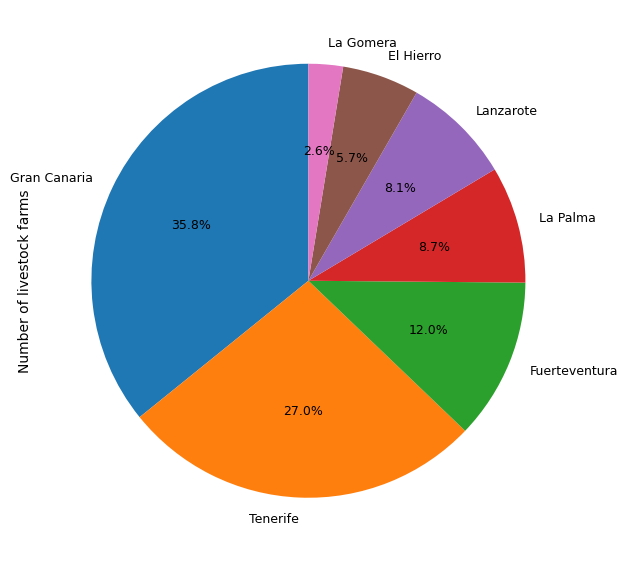

In [33]:
livestockFarmsPerIsland = finalDataset.groupby(['isla']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Number of livestock farms'})
display(livestockFarmsPerIsland)
print("\nTotal number of livestock farms in the Canary Islands: ", livestockFarmsPerIsland['Number of livestock farms'].sum(), end = " " )

livestockFarmsPerIsland.plot(kind='pie', y = 'Number of livestock farms', autopct='%1.1f%%',
startangle=90, shadow=False, labels=livestockFarmsPerIsland['isla'], legend = False, fontsize=9,figsize=(7,78))
plt.show()

livestockFarmsPerIslandDirectoryPath = os.path.join('results', "livestockFarmsPerIsland.csv")
livestockFarmsPerIsland.to_csv(livestockFarmsPerIslandDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

#### Number of livestock farms per municipalities

In [34]:
livestockFarmsPerMunicipalities = finalDataset.groupby(['isla', 'municipio_nombre',]).size().sort_values(ascending=False).reset_index().rename(columns={0:'Number of livestock farms'})
display(livestockFarmsPerMunicipalities)
print("\nTotal number of livestock farms in the Canary Islands: ", livestockFarmsPerMunicipalities['Number of livestock farms'].sum(), end = " " )

livestockFarmsPerMunicipalitiesDirectoryPath = os.path.join('results', "livestockFarmsPerMunicipalities.csv")
livestockFarmsPerMunicipalities.to_csv(livestockFarmsPerMunicipalitiesDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

,isla,municipio_nombre,Number of livestock farms
0,Gran Canaria,Telde,722
1,Tenerife,San Cristóbal de La Laguna,590
2,Fuerteventura,Puerto del Rosario,573
3,Gran Canaria,Agüimes,395
4,Gran Canaria,Ingenio,389
...,...,...,...
83,La Gomera,Valle Gran Rey,15
84,Tenerife,Puerto de la Cruz,15
85,La Gomera,Hermigua,14
86,Tenerife,La Victoria de Acentejo,14



Total number of livestock farms in the Canary Islands:  12742 

#### Number of animals per livestock farm

In [35]:
animalsPerLivestockFarm = finalDataset.groupby(['explotacion_id', 'isla', 'municipio_nombre'])['censo'].sum().sort_values(ascending=False).reset_index()
display(animalsPerLivestockFarm)
print("\nTotal number of animals registered in the Canary Islands: ", animalsPerLivestockFarm['censo'].sum(), end = " " )

,explotacion_id,isla,municipio_nombre,censo
0,ES350340023425,Lanzarote,Yaiza,5502857
1,ES380450023250,La Palma,Tazacorte,3600000
2,ES350260023237,Gran Canaria,Telde,2740000
3,ES380010026599,Tenerife,Adeje,1515000
4,ES380060023653,Tenerife,Arona,1205000
...,...,...,...,...
4147,ES350070027413,Fuerteventura,Betancuria,1
4148,ES350080005937,Gran Canaria,Firgas,1
4149,ES350080006063,Gran Canaria,Firgas,1
4150,ES350020009467,Gran Canaria,Agüimes,0



Total number of animals registered in the Canary Islands:  22225974 

#### Number of animals per island

In [36]:
animalsPerIsland = finalDataset.groupby('isla')['censo'].sum().sort_values(ascending=False).reset_index()
display(animalsPerIsland)
print("\nTotal number of animals registered in the Canary Islands: ", animalsPerIsland['censo'].sum(), end = " " )

animalsPerIslandDirectoryPath = os.path.join('results', "animalsPerIsland.csv")
animalsPerIsland.to_csv(animalsPerIslandDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

,isla,censo
0,Tenerife,8116373
1,Lanzarote,5611173
2,Gran Canaria,4691447
3,La Palma,3667466
4,Fuerteventura,109917
5,El Hierro,14925
6,La Gomera,14673



Total number of animals registered in the Canary Islands:  22225974 

#### Number of animals per municipalities

In [37]:
animalsPerMunicipalities = finalDataset.groupby(['isla', 'municipio_nombre', ])['censo'].sum().sort_values(ascending=False).reset_index()
display(animalsPerMunicipalities)
print("\nTotal number of animals registered in the Canary Islands: ", animalsPerMunicipalities['censo'].sum(), end = " " )

animalsPerMunicipalitiesDirectoryPath = os.path.join('results', "animalsPerMunicipalities.csv")
animalsPerMunicipalities.to_csv(animalsPerMunicipalitiesDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

,isla,municipio_nombre,censo
0,Lanzarote,Yaiza,5509859
1,Tenerife,Arona,4106902
2,La Palma,Tazacorte,3600380
3,Gran Canaria,Telde,2933320
4,Tenerife,Adeje,1519341
...,...,...,...
83,Tenerife,La Victoria de Acentejo,274
84,Tenerife,Santiago del Teide,255
85,La Palma,San Andrés y Sauces,228
86,Tenerife,Puerto de la Cruz,161



Total number of animals registered in the Canary Islands:  22225974 

#### List of animal types, their breed, and purpose by island

In [38]:
animalsTypePerIsland = finalDataset.groupby(['isla', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'])['censo'].sum().reset_index()

# Obtain specific data about an island
#islandName ='Fuerteventura'
#islandAnimalsType = animalsTypePerIsland.loc[animalsTypePerIsland['isla'] == islandName]
#islandAnimalsType = islandAnimalsType.sort_values(by=['isla', 'censo', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'], ascending=False)

# Obtain data from all of the Canary Islands
islandAnimalsType = animalsTypePerIsland.sort_values(by=['isla', 'censo', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'], ascending=False)

display(islandAnimalsType)

islandAnimalsTypeDirectoryPath = os.path.join('results', "animalsTypePerIsland.csv")
islandAnimalsType.to_csv(islandAnimalsTypeDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

,isla,especie_nombre,raza_nombre,tipo_animal_ganado_nombre,censo
1116,Tenerife,Dorada (Sparus aurata),No aplicable,Nº de adultos de engorde,3125000
1132,Tenerife,Lubina o robalo (Dicentrarchus labrax),No aplicable,Nº de adultos de engorde,2420000
1126,Tenerife,Gallinas,Desconocido,Granjas de producción para carne,953520
1129,Tenerife,Gallinas,Desconocido,Granjas de producción para huevos. En jaula,600225
1195,Tenerife,Pulpo (Octopus vulgaris),No aplicable,Nº de huevos,500000
...,...,...,...,...,...
31,El Hierro,Bovinos,Rubia Gallega,Reproductoras hembra,1
10,El Hierro,Asnos,Mestiza,No reproductores con más de 36 meses,1
9,El Hierro,Asnos,Mestiza,Hembras de vientre con más de 36 meses,1
8,El Hierro,Asnos,Majorera,Hembras de vientre con más de 36 meses,1


#### List of animal types, their breed, and purpose by municipalities

In [39]:
animalsTypePerMunicipalities = finalDataset.groupby(['isla', 'municipio_nombre', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'])['censo'].sum().reset_index()

# Obtain specific data about an municipality
#municipality ='Agulo'
#municipalitiesAnimalsType = animalsTypePerMunicipalities.loc[animalsTypePerMunicipalities['municipio_nombre'] == municipality]
#municipalitiesAnimalsType = municipalitiesAnimalsType.sort_values(by=['isla', 'censo', 'municipio_nombre', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'], ascending=False)

# Obtain data from all of the municipalities
municipalitiesAnimalsType = animalsTypePerMunicipalities.sort_values(by=['isla', 'censo', 'municipio_nombre', 'especie_nombre', 'raza_nombre', 'tipo_animal_ganado_nombre'], ascending=False)

display(municipalitiesAnimalsType)

municipalitiesAnimalsTypeDirectoryPath = os.path.join('results', "animalsTypePerMunicipalities.csv")
municipalitiesAnimalsType.to_csv(municipalitiesAnimalsTypeDirectoryPath, sep=';', index=False, encoding='utf-8-sig')

,isla,municipio_nombre,especie_nombre,raza_nombre,tipo_animal_ganado_nombre,censo
3045,Tenerife,Arona,Dorada (Sparus aurata),No aplicable,Nº de adultos de engorde,2185000
3051,Tenerife,Arona,Lubina o robalo (Dicentrarchus labrax),No aplicable,Nº de adultos de engorde,1845000
2871,Tenerife,Adeje,Dorada (Sparus aurata),No aplicable,Nº de adultos de engorde,940000
2874,Tenerife,Adeje,Lubina o robalo (Dicentrarchus labrax),No aplicable,Nº de adultos de engorde,575000
4014,Tenerife,Santa Cruz de Tenerife,Pulpo (Octopus vulgaris),No aplicable,Nº de huevos,500000
...,...,...,...,...,...,...
44,El Hierro,Frontera,Bovinos,Blonde D'Aquitaine,Reproductores macho,1
42,El Hierro,Frontera,Asnos,Mestiza,Hembras de vientre con más de 36 meses,1
22,El Hierro,El Pinar de El Hierro,Conejos,Híbrido Selecto,Padres,1
18,El Hierro,El Pinar de El Hierro,Conejos,Californiana,Padres,1


---

# Geographic data obtained from the dataset

#### Locations of farms by animal species and island

In [40]:
canaryIslandsCoordinates = [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['isla'] == 'Tenerife') & (finalDataset['especie_nombre'] == 'Dorada (Sparus aurata)') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animal species and municipality

In [41]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['municipio_nombre'] == 'Candelaria') & (finalDataset['especie_nombre'] == 'Caprinos') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animal species

In [42]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['especie_nombre'] == 'Dorada (Sparus aurata)')]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animals type and island

In [43]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['isla'] == 'Gran Canaria') & (finalDataset['tipo_animal_ganado_nombre'] == 'Granjas de cría para carne') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animals type and municipality

In [44]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['municipio_nombre'] == 'Candelaria') & (finalDataset['tipo_animal_ganado_nombre'] == 'Cebo') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animals type

In [45]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['tipo_animal_ganado_nombre'] == 'Cebo')]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

#### Locations of farms by animals' breed and island

In [46]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['isla'] == 'Tenerife') & (finalDataset['raza_nombre'] == 'Mestizo') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

####  Locations of farms by animals' breed and municipality

In [47]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['municipio_nombre'] == 'Candelaria') & (finalDataset['raza_nombre'] == 'Mestizo') ]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map

####  Locations of farms by animals' breed

In [48]:
canaryIslandsCoordinates =  [float(28.087749686092238), float(-15.78147406169936)]
map = folium.Map(canaryIslandsCoordinates, zoom_start = 8, min_zoom=8,max_zoom=18)

selectedFarms = finalDataset.loc[(finalDataset['raza_nombre'] == 'Mestiza')]

for i in range(0, len(selectedFarms)):
  folium.Marker([float(selectedFarms.iloc[i]['latitud']), float(selectedFarms.iloc[i]['longitud'])],
                popup = selectedFarms.iloc[i]['explotacion_id']).add_to(map),

map